[-0.98115872  0.99986167]
[[-1]
 [ 1]]
[[ 2.0370319  -1.86654061]
 [-1.86654061  2.06958812]]
[[ 2.  -1.8]
 [-1.8  2. ]]


array([[ 1.19828623, -0.53108855],
       [-0.75107264,  0.84731632]])

array([[ 1.19828623, -0.75107264],
       [-0.75107264,  1.19828623]])

array([[ 1.        ,  0.        ],
       [ 0.        ,  0.70710678]])

(2, 1)

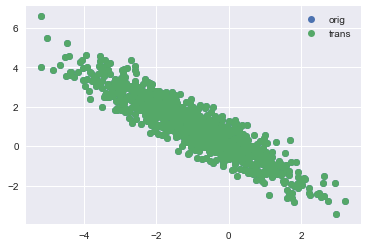

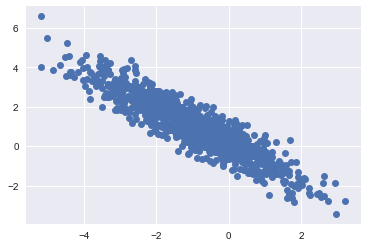

In [67]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
sns.set()
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

%matplotlib inline

u_1 = np.array([[1],[2]])
cov_1 = np.array([[1,0],[0,2]])

u_2 = np.array([[-1],[1]])
cov_2 = np.array([[2,-1.8],[-1.8,2]])

n_pt = 1000
rand_xy = np.squeeze(np.array([[np.random.randn(n_pt)],[np.random.randn(n_pt)]]))
#np.shape(rand_xy)
#sns.jointplot(rand_xy[0,:],rand_xy[1,:])

w1,v1 = scipy.linalg.eig(cov_1)
idx = w1.argsort()[::-1]   
w1 = np.real(w1[idx])
v1 = v1[:,idx]
a_1 = v1*(w1**0.5)

rand_xy_scale_1 = np.dot(a_1,rand_xy) + np.matlib.repmat(u_1,1,n_pt)
x1 = rand_xy_scale_1[0,:]
y1 = rand_xy_scale_1[1,:]

w2,v2 = scipy.linalg.eig(cov_2)
idx = w2.argsort()[::-1]   
w2 = np.real(w2[idx])
v2 = v2[:,idx]
a_2 = v2*(w2**0.5)

w1_half = w1**0.5
cov_1_half = v1*w1_half*v1.T
cov_1_half = scipy.linalg.sqrtm(cov_1)
cov_1_half_inv = np.linalg.inv(cov_1_half)
rand_xy_scale_1_v2 = np.dot(cov_1_half,rand_xy) + np.matlib.repmat(u_1,1,n_pt)

# now go back!

w2_half = w2**0.5
cov_2_half = v2*w2_half*v2.T
cov_2_half = scipy.linalg.sqrtm(cov_2)
rand_xy_scale_2_v2 = np.dot(cov_2_half,rand_xy) + np.matlib.repmat(u_2,1,n_pt)

A = np.dot(cov_2_half,cov_1_half_inv)
B = u_2 - np.dot(cov_2_half,np.dot(cov_1_half_inv,u_1))

trans = np.dot(A,rand_xy_scale_1_v2)+np.matlib.repmat(B,1,n_pt)
#trans = np.dot(cov_1_half_inv,rand_xy_scale_1_v2)+np.matlib.repmat(B,1,n_pt)

average = np.mean(trans,axis=1)
covariance = np.cov(trans)

print(average)
print(u_2)
print(covariance)
print(cov_2)

plt.figure()
plt.plot(rand_xy_scale_2_v2[0],rand_xy_scale_2_v2[1],'o',label='orig')
plt.plot(trans[0],trans[1],'o',label='trans')
plt.legend()
A
cov_2_half
cov_1_half_inv
np.shape(B)

plt.figure()
plt.plot(trans[0],trans[1],'o')

array([ 0.0145252 ,  0.03360953])

array([[ 0.99320889,  0.02944825],
       [ 0.02944825,  0.91323715]])

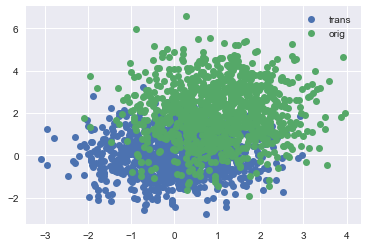

In [60]:
back = np.dot(cov_1_half_inv,rand_xy_scale_1) - np.dot(cov_1_half_inv,u_1)
plt.figure()
plt.plot(back[0],back[1],'o',label='trans')
plt.plot(rand_xy_scale_1[0],rand_xy_scale_1[1],'o',label='orig')
plt.legend()
np.mean(back,axis=1)
np.cov(back)